# **Identifying Pneumonia Using Deep Learning**
## Yung Han Jeong, Dan Valenzuela

***



In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys
from PIL import Image

module_path = os.path.abspath(os.path.join( 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from modules import dataloading as dl
from modules import VizAx as va

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Overview** <a id="Overview"></a>

This project aims to develop a deep learning model to accurately identify cases of pneumonia using x-ray images of patients' lungs. Doctors both overdiagnose and underdiagnose pneumonia, both of which can have fatal consequences


[**1. Business Problem**](#Business-Problem)

[**2. Data Understanding**](#Data-Understanding)

[**3. Data Preparation**](#Data-Preparation)

[**4. Data Analysis**](#Data-Analysis)

[**5. Evaluation**](#Evaluation)

[**6. Conclusion and Next Steps**](#Conclusion)

[**7. Endnotes**](#Endnotes)
***

## **Business Problem** <a id="Business-Problem"></a>
[*↑ Back to overview*](#Overview)

Doctors both overdiagnose and underdiagnose pneumonia, both of which have can have fatal consequences. <a id="FN-1-SRC"></a>[<sup>1</sup>](#FN-1) A failure to diagnose pneumonia (and generally underdiagnosing in a population) can lead to potentially fatal complications as the illness develops. And diagnosing pneumonia when it doesn't exist (and generally overdiagnosing in a population) can increase the prescription of antibiotics, which can lead to the development of antibiotic-resistant pathogens. <a id="FN-2-SRC"></a> [<sup>2</sup>](#FN-2)

Part of this problem can be due to the fact that examination of chest x-rays by doctors are limited by the structures and bias of human perception. Other researchers have found that deep-learning models have helped doctors interpret chest x-rays for signs of pneumonia. <a id="FN-3-SRC"></a> [<sup>3</sup>](#FN-3)

This project aims to contribute to current efforts in developing machine learning-assisted pneumonia diagnoses by creating a deep-learning model that classifies chest x-ray images as having pneumonia or not having pneumonia. To that end, first we give an overview of the images used to train the deep-learning model.

[*↑ Back to overview*](#Overview)
***

## **Data Understanding** <a id="Data-Understanding"></a>
[*↑ Back to overview*](#Overview)

We obtained a repository of chest x-ray images from [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) which contains 5,856 chest x-ray images. 

In [2]:
index_df = pd.read_csv('data/image_index_dtl.csv')
index_df.shape[0]

5856

Of these images, approximately 4,200 of them are images of lungs with viral or bacterial pneumonia, and the other 1,600 do not have pneumonia. One potential challenge with the images of pneumonia is the fact that bacterial and viral pneumonia manifest themselves in different ways. Bacterial pneuomnia shows mass in the lungs in concentrated areas whereas viral pneumonia shows increased mass throughout the lungs.

In [3]:
index_df.condition.value_counts()

1    4273
0    1583
Name: condition, dtype: int64

<center><img src='images/CXRimages.png' width=500></center>

Further, each of the images come in varying sizes and color. Generally speaking the images are about 1.5 times wider than they are high. But images can range from approximately 127x384 pixels to 2583x2916 pixels with a large portion of the color images being less than 800 pixels high or 1300 pixels wide.

/Users/danielvalenzuela/Documents/Flatiron/Repositories/phase4/Pneumonia-ID/src/modules/VizAx.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  Title = "Dimensions of Images Colored by Image Type"


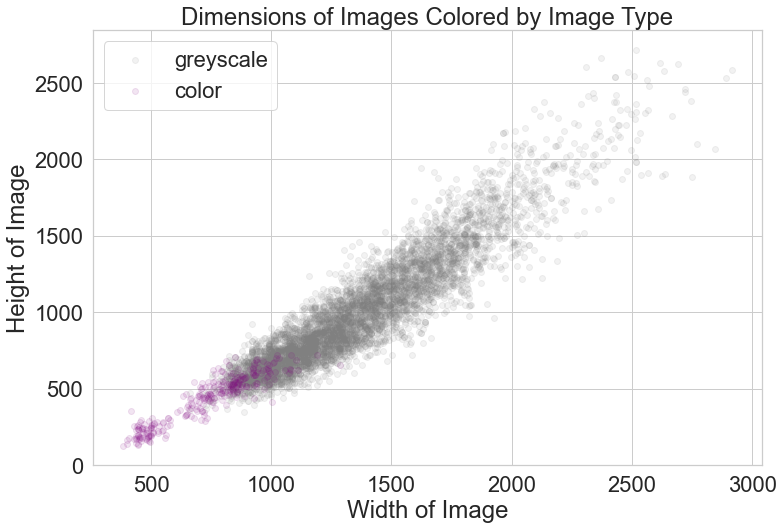

In [7]:
va.channelScatter(index_df)

The variability of these images are dealt with in data preparation. Generally, the variability across the images requires that some transformations be done to the images to help with standardization.

For example, the image below with the smallest width in the dataset is in color and much wider than it is high. Such an image may require a crop and transformation into greyscale. The image below with the largest width among the dataset, on the otherhand, is already in greyscale but will likely require a re-sizing to be consistent with the dataset that is largely smaller than this image.

### Image with Smallest Width

In [30]:
smallest_w = index_df[index_df['width']==index_df.width.min()]
smallest_w

img  data_set  condition  \
4306  ..\..\data\extracted\chest_xray\train\PNEUMONI...         1          1   

       image_tensor  channels  height  width data_set_name  
4306  [3, 127, 384]         3     127    384         train

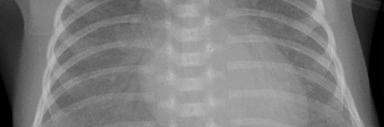

In [31]:
im = Image.open(smallest_w.iloc[0]['img'].replace("\\", "/").split("/",2)[2])
im

### Image with Largest Width

In [11]:
biggest_w = index_df[index_df['width']==index_df.width.max()]
biggest_w

img  data_set  condition  \
1858  ..\..\data\extracted\chest_xray\train\NORMAL\N...         1          0   

         image_tensor  channels  height  width data_set_name  
1858  [1, 2583, 2916]         1    2583   2916         train

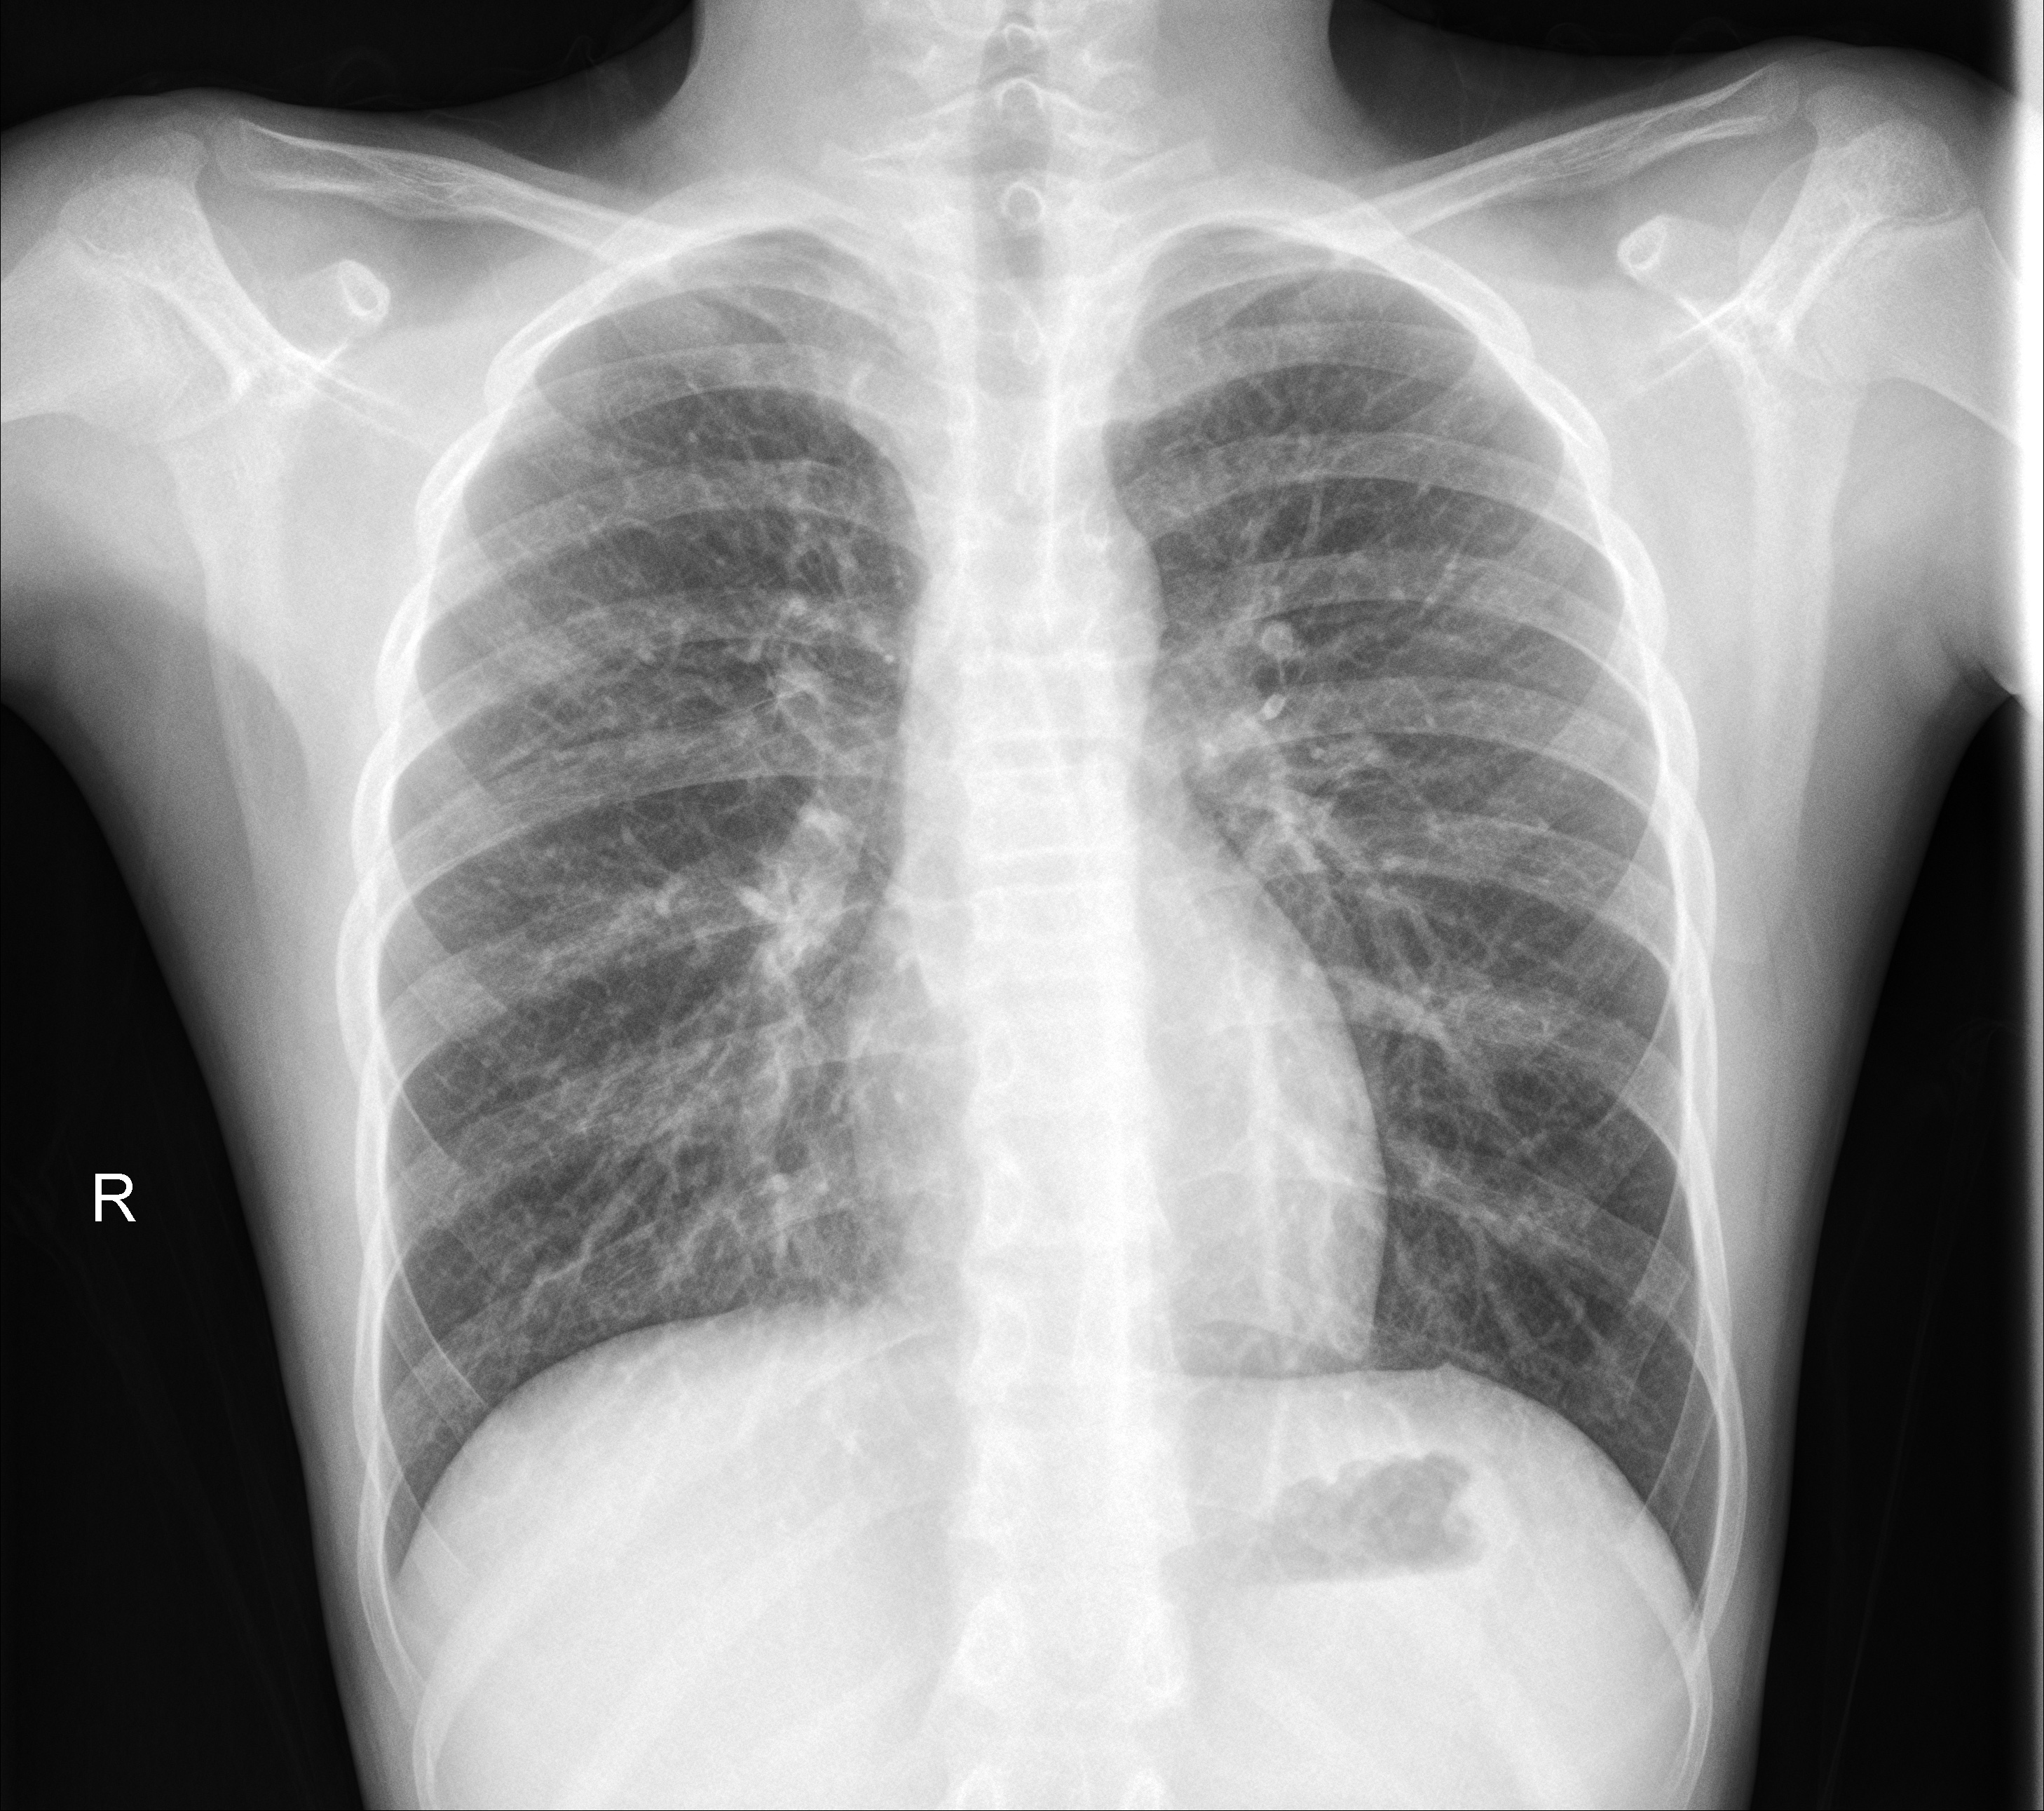

In [32]:
im = Image.open(biggest_w.iloc[0]['img'].replace("\\", "/").split("/",2)[2])
im

[*↑ Back to overview*](#Overview)
***

## **Data Preparation** <a id="Data-Preparation"></a>
[*↑ Back to overview*](#Overview)

[*↑ Back to overview*](#Overview)
***

## **Data Analysis** <a id="Data-Analysis"></a>
[*↑ Back to overview*](#Overview)

[*↑ Back to overview*](#Overview)
***

## **Evaluation**<a id="Evaluation"></a>
[*↑ Back to overview*](#Overview)


[*↑ Back to overview*](#Overview)
***

## **Conclusion and Next Steps**<a id="Conclusion"></a>
[*↑ Back to overview*](#Overview)

[*↑ Back to overview*](#Overview)
***

## **Endnotes**<a id="Endnotes"></a>
[*↑ Back to overview*](#Overview)

<a id="FN-1"></a> [1:](#FN-1-SRC) https://jamanetwork.com/journals/jamainternalmedicine/article-abstract/485032

<a id="FN-2"></a> [2:](#FN-2-SRC) https://www.sciencedirect.com/science/article/pii/S1201971219303534

<a id="FN-3"></a> [3:](#FN-3-SRC) https://med.stanford.edu/news/all-news/2017/11/algorithm-can-diagnose-pneumonia-better-than-radiologists.html

[*↑ Back to overview*](#Overview)
***